###A3: Unsupervised learning with k-means
Dataset: winequality-red.txt || https://archive.ics.uci.edu/dataset/186/wine+quality

K-means is a clustering method, which aims to partition a set of n observations into k groups in which each observation belongs to the group whose mean value is closest. It is a method used in data mining.



# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# Loading dataset

In [2]:
# Load training data
filename = '/content/winequality_red.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

features = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]
target = ["quality"]

# Separating out the features
X = df[features]

print(X.describe())

# Separating out the target (class)
y = df[target]


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

https://plotly.com/python/splom/

A scatterplot matrix is a matrix associated to n numerical arrays (data variables), $X_1,X_2,…,X_n$ , of the same length. The cell (i,j) of such a matrix displays the scatter plot of the variable Xi versus Xj.

Here we show the Plotly Express function px.scatter_matrix to plot the scatter matrix for the columns of the dataframe. By default, all columns are considered.

In [3]:
fig = px.scatter_matrix(df, dimensions=["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"], color="quality")
fig.show()

# Standardize the data

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

For instance many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the L1 and L2 regularizers of linear models) assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

In [4]:
X_norm = StandardScaler().fit_transform(X)

print(X_norm)

[[-0.52835961  0.96187667 -1.39147228 ...  1.28864292 -0.57920652
  -0.96024611]
 [-0.29854743  1.96744245 -1.39147228 ... -0.7199333   0.1289504
  -0.58477711]
 [-0.29854743  1.29706527 -1.18607043 ... -0.33117661 -0.04808883
  -0.58477711]
 ...
 [-1.1603431  -0.09955388 -0.72391627 ...  0.70550789  0.54204194
   0.54162988]
 [-1.39015528  0.65462046 -0.77526673 ...  1.6773996   0.30598963
  -0.20930812]
 [-1.33270223 -1.21684919  1.02199944 ...  0.51112954  0.01092425
   0.54162988]]


# Get K value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

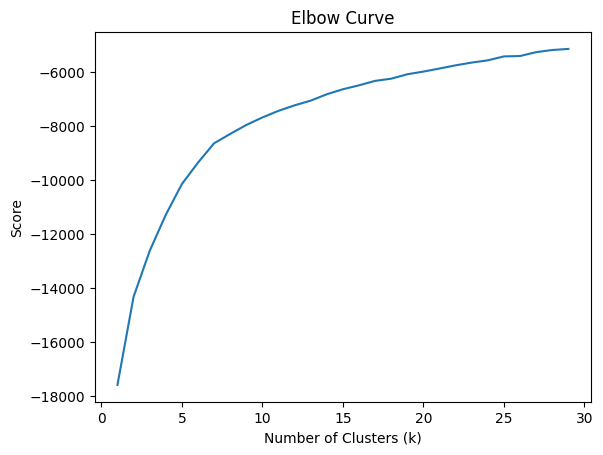

In [5]:
nc = range(1, 30)
kmeans = [KMeans(n_clusters=i) for i in nc]
kmeans
score = [kmeans[i].fit(X_norm).score(X_norm) for i in range(len(kmeans))]
score
plt.plot(nc,score)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

# K-means execution
https://scikit-learn.org/stable/modules/clustering.html#k-means



In [6]:
n_classes =  np.unique(y).size


kmeans = KMeans(n_clusters=n_classes, init="random", n_init=10, max_iter=300, algorithm = 'auto')
kmeans.fit(X_norm)


df['KMeans_clusters'] = kmeans.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning:

algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,KMeans_clusters
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


<a id="6"></a>
## Visualize 2D Projection

[5 5 5 ... 6 5 6]


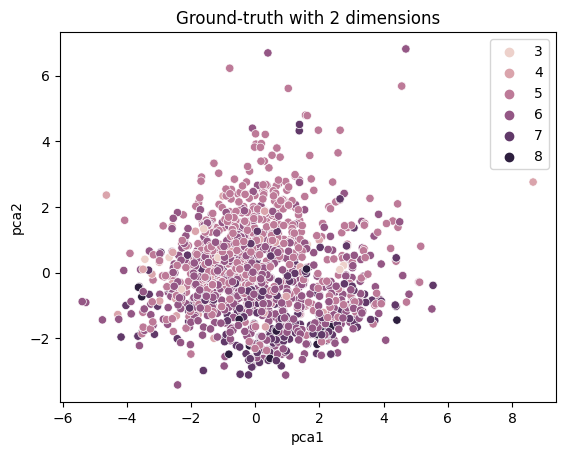

[0 0 0 ... 1 0 1]


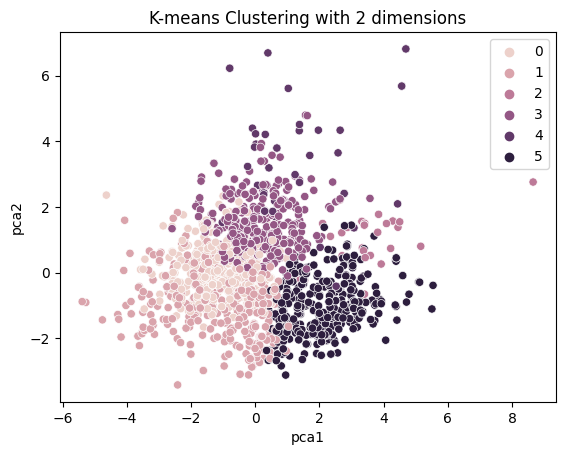

In [7]:
reduced_data = PCA(n_components=2).fit_transform(X_norm)
results = pd.DataFrame(data=reduced_data, columns=['pca1','pca2'])

print(y.values.flatten())

sb.scatterplot(x="pca1", y="pca2", hue=y.values.flatten(), data=results)
plt.title('Ground-truth with 2 dimensions')
plt.show()

print(kmeans.labels_)

sb.scatterplot(x="pca1", y="pca2", hue=kmeans.labels_, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()

<a id="7"></a>
## Visualize 3D Projection

          pca1      pca2      pca3
0    -1.619530  0.450950 -1.774454
1    -0.799170  1.856553 -0.911690
2    -0.748479  0.882039 -1.171394
3     2.357673 -0.269976  0.243489
4    -1.619530  0.450950 -1.774454
...        ...       ...       ...
1594 -2.150500  0.814286  0.617063
1595 -2.214496  0.893101  1.807402
1596 -1.456129  0.311746  1.124239
1597 -2.270518  0.979791  0.627965
1598 -0.426975 -0.536690  1.628955

[1599 rows x 3 columns]


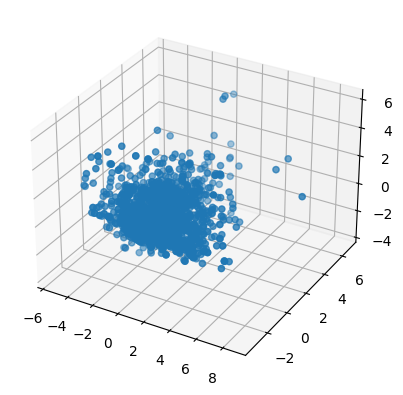

In [8]:
reduced_data = PCA(n_components=3).fit_transform(X_norm)
results = pd.DataFrame(data=reduced_data, columns=['pca1','pca2','pca3'])
print(results)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(results['pca1'], results['pca2'], results['pca3'])
plt.show()